In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

import warnings

warnings.filterwarnings

%matplotlib inline

In [172]:
data =pd.read_excel('data-excel.xlsx')

data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [173]:
data.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [174]:
data = data.dropna(subset=['Itemname'])

In [175]:
data=data.fillna(10000)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520609 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      520609 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    520609 non-null  int64         
 3   Date        520609 non-null  datetime64[ns]
 4   Price       520609 non-null  float64       
 5   CustomerID  520609 non-null  float64       
 6   Country     520609 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.8+ MB


In [177]:
# counting rows the 0 or less quantity in dataset
negativeQuantity = data.loc[data['Quantity']<=0]

len(negativeQuantity)

473

In [178]:
# counting the rows with 0 prices 
ZeroPrice = data.loc[data['Price']<=0]

len(ZeroPrice)

1058

In [179]:
# dropping the rows with  less than 0 price and quantity
data = data.loc[data['Price']>0]

data= data.loc[data['Quantity']>0]

In [180]:
data['Total Price'] = data['Price'] * data['Quantity']

data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total Price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [181]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total Price,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


In [182]:
data['Year'].value_counts()

2011    478581
2010     40970
Name: Year, dtype: int64

In [183]:
data['Month'].value_counts()

11    81969
12    65719
10    58021
9     47935
7     37730
5     35501
6     35029
3     34772
1     34076
8     33609
4     28730
2     26460
Name: Month, dtype: int64

In [184]:
data['Country'].value_counts()

United Kingdom          485123
Germany                   9040
France                    8407
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
Australia                 1182
Norway                    1071
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         57
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: Country, dtype: int64

In [185]:
#I will use united kingdom data
UK_data = data.loc[data['Country']=='United Kingdom']

UK_data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total Price,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


In [186]:
months_total = UK_data.groupby('Month')['Total Price'].sum().reset_index()

months_total

,Month,Total Price
0,1,561289.980
1,2,430027.950
2,3,586230.280
3,4,476517.761
4,5,639314.360
5,6,619510.670
6,7,601994.841
7,8,608047.480
8,9,897076.472
9,10,938975.010


In [187]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

months_total['Month'] = months_total['Month'].map(month_mapping)

months_total

,Month,Total Price
0,January,561289.980
1,February,430027.950
2,March,586230.280
3,April,476517.761
4,May,639314.360
5,June,619510.670
6,July,601994.841
7,August,608047.480
8,September,897076.472
9,October,938975.010


In [188]:
months_total['Month'] = pd.Categorical(months_total['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

months_total= months_total.sort_values('Month')

months_total

,Month,Total Price
0,January,561289.980
1,February,430027.950
2,March,586230.280
3,April,476517.761
4,May,639314.360
5,June,619510.670
6,July,601994.841
7,August,608047.480
8,September,897076.472
9,October,938975.010


Text(0.5, 1.0, 'United Kingdom Monthly sales')

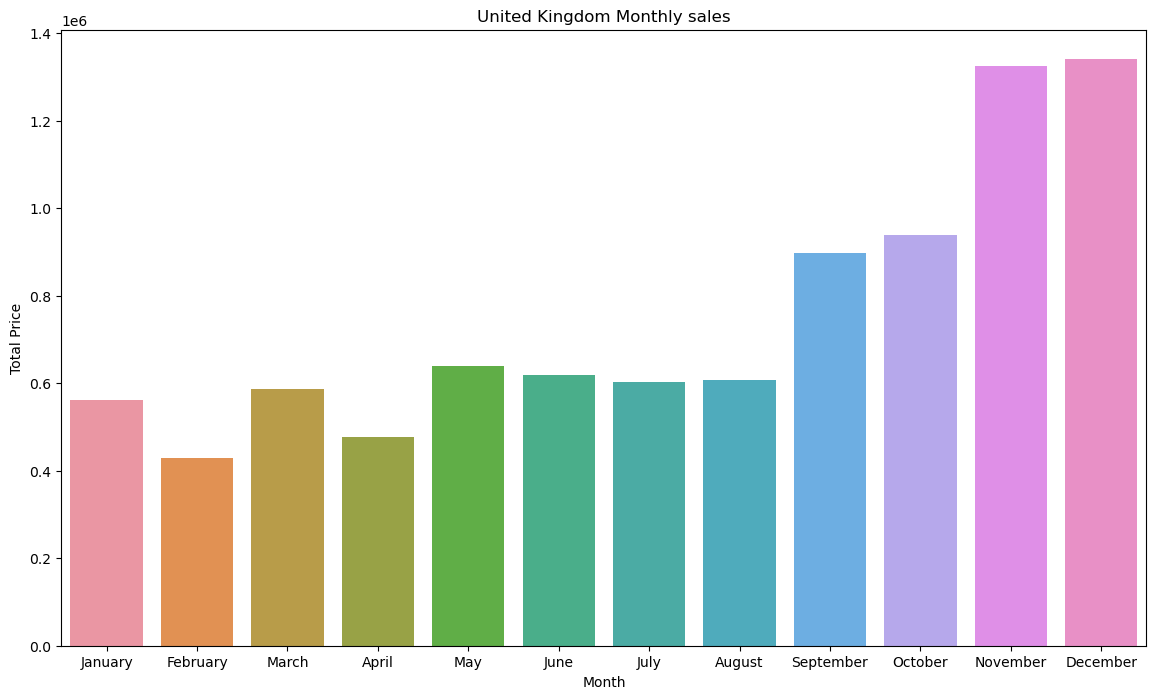

In [189]:
plt.figure(figsize=(14,8))
sbn.barplot(months_total, x="Month", y="Total Price")

plt.title("United Kingdom Monthly sales")

In [190]:
UK_data['Itemname'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2227
JUMBO BAG RED RETROSPOT               1957
REGENCY CAKESTAND 3 TIER              1710
PARTY BUNTING                         1614
LUNCH BAG RED RETROSPOT               1421
                                      ... 
BLACK CHRISTMAS FLOCK DROPLET            1
ORANGE/FUSCHIA STONES NECKLACE           1
BLACK GLASS/SHELL/PEARL NECKLACE         1
PINK/WHITE GLASS DEMI CHOKER             1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Itemname, Length: 3996, dtype: int64

In [191]:
# top ten purchased items in the UK and the month it was purchased the most 
items_sales = UK_data.groupby(['Itemname','Month'])['Total Price'].sum().reset_index()

idx = items_sales.groupby('Itemname')['Total Price'].idxmax()

most_purchased_month = items_sales.loc[idx].reset_index(drop=True)

most_purchased_month.sort_values('Total Price',ascending=False).head(10)

,Itemname,Month,Total Price
2367,"PAPER CRAFT , LITTLE BIRDIE",12,168469.60
2031,MEDIUM CERAMIC TOP STORAGE JAR,1,77183.60
1052,DOTCOM POSTAGE,12,44543.88
2441,PICNIC BASKET WICKER 60 PIECES,6,39619.50
2827,REGENCY CAKESTAND 3 TIER,12,30642.98
2361,PAPER CHAIN KIT 50'S CHRISTMAS,11,28237.79
2714,RABBIT NIGHT LIGHT,11,23238.16
2392,PARTY BUNTING,5,18267.85
3815,WHITE HANGING HEART T-LIGHT HOLDER,1,14517.25
2654,POPCORN HOLDER,11,13862.90


In [192]:
transcations_per_month = UK_data.groupby('Month')['BillNo'].nunique().reset_index()

transcations_per_month['Month']=transcations_per_month['Month'].map(month_mapping)

Text(0.5, 1.0, 'United Kingdom Monthly transcations')

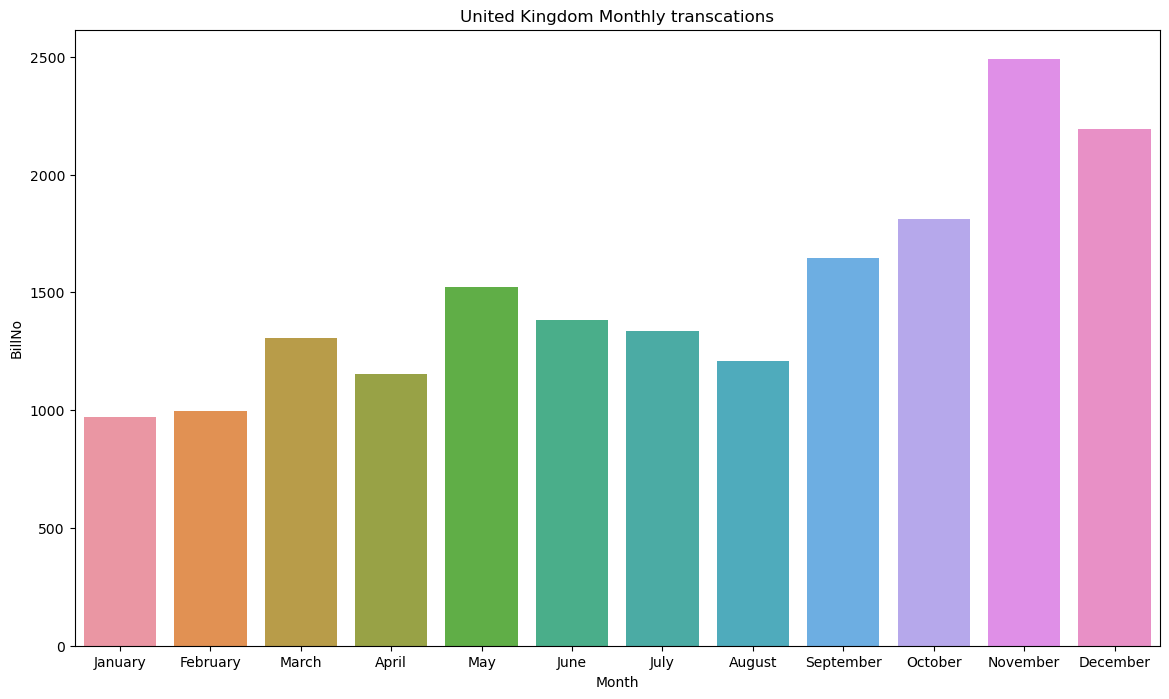

In [193]:
plt.figure(figsize=(14,8))
sbn.barplot(transcations_per_month, x="Month", y="BillNo")

plt.title("United Kingdom Monthly transcations")

In [194]:
UK_data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total Price,Month,Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


In [195]:
Weekly_transcations = UK_data.groupby(data['Date'].dt.strftime('%A'))['BillNo'].nunique().reset_index()
                                      
Weekly_transcations

,Date,BillNo
0,Friday,2776
1,Monday,2802
2,Sunday,2070
3,Thursday,3807
4,Tuesday,3245
5,Wednesday,3319


Text(0.5, 1.0, 'United Kingdom Monthly transcations')

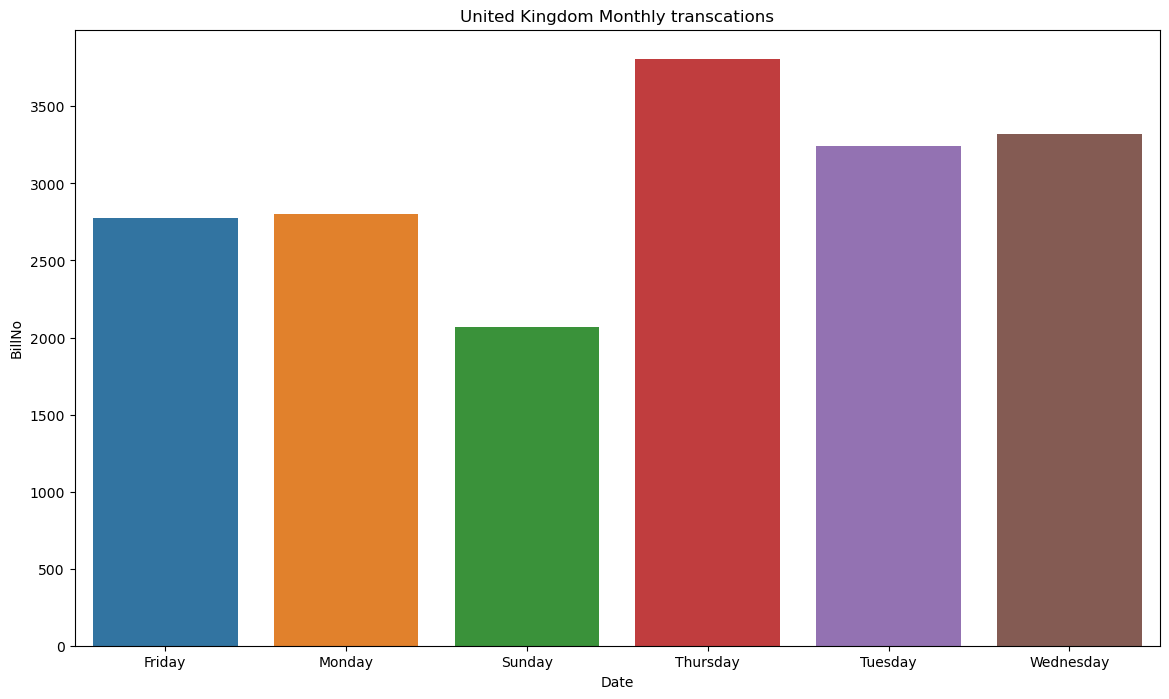

In [196]:
plt.figure(figsize=(14,8))
sbn.barplot(Weekly_transcations, x="Date", y="BillNo")

plt.title("United Kingdom Weekly transcations")

In [197]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [198]:
UK_data['Itemname'] = UK_data['Itemname'].str.strip()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10096\3021971096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_data['Itemname'] = UK_data['Itemname'].str.strip()


In [199]:
basket = UK_data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')

basket.head()

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
def hot_encode(x): 
    if x<= 0: 
        return 0
    if x>= 1: 
        return 1
    
basket = basket.applymap(hot_encode)

In [201]:
basket.head()

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
basket_set = basket.astype(bool)

In [217]:
frequent_items = apriori(basket_set, min_support=0.03, use_colnames=True)

frequent_items.head()

,support,itemsets
0,0.047450,(6 RIBBONS RUSTIC CHARM)
1,0.032244,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.041789,(60 TEATIME FAIRY CAKE CASES)
3,0.030801,(72 SWEETHEART FAIRY CAKE CASES)
4,0.048615,(ALARM CLOCK BAKELIKE GREEN)


In [218]:
rules = association_rules(frequent_items,metric='lift',min_threshold=1.0)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.051612,0.048615,0.031245,0.605376,12.452370,0.028736,2.410866,0.969745
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048615,0.051612,0.031245,0.642694,12.452370,0.028736,2.654274,0.966690
2,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041623,0.049836,0.030024,0.721333,14.474059,0.027950,3.409678,0.971341
3,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.049836,0.041623,0.030024,0.602450,14.474059,0.027950,2.410708,0.979737
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038959,0.051723,0.031966,0.820513,15.863541,0.029951,5.283257,0.974945
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051723,0.038959,0.031966,0.618026,15.863541,0.029951,2.515984,0.988068
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053055,0.051723,0.038848,0.732218,14.156468,0.036104,3.541221,0.981431
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051723,0.053055,0.038848,0.751073,14.156468,0.036104,3.804106,0.980052
8,(JUMBO BAG RED RETROSPOT),(JUMBO BAG BAROQUE BLACK WHITE),0.107387,0.050502,0.031633,0.294574,5.832882,0.026210,1.345991,0.928239
9,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050502,0.107387,0.031633,0.626374,5.832882,0.026210,2.389053,0.872628
